# <center> Lecture 09 - Random Forest and Boosting Methods </center>

## Outline
- Decision Trees Review
- Bagging
- Random Forest
- Gradient Boost
- AdaBoost
- XGBoost


## Decision Tree Review

- Without a heavy mathematical background, it is easy to interpret a decision tree (especially if it is small); linear regression requires the understanding of an equation. 
- Decision trees can graphically depict a higher dimensionality easier than linear regression and still be interpreted by a novice. 
- The process can easily adapt to qualitative predictors without the need to create and interpret dummy variables. 
- Decision trees are often believed to reflect a more “human” decision-making process as compared to other machine learning methods. 
- While relatively non-complex among other supervised learning procedures, as a trade-off their predictive accuracy tends to be lower and thus not as competitive. 
- What if we could combine the benefits of multiple trees in order to yield an overall prediction? Taking the penalty of decreased interpretative value, could this potentially increase our predictive accuracy? 
    - Bagging 
    - Random Forests 
    - Boosting 


### Decision Tree Pros and Cons Summary
- Pros:
    - Interpretability: easier to explain than most other regression methods.
    - Easy to handle qualitative predictors.
    - Can be displayed graphically.
- Cons:
    - Instability: a small change in the data may result in a huge different splits.
    - Predictive accuracy usually not as good as other approaches.
- By aggregating many decision trees, the predictive performance can be improved substantially.

### DT classifiers and regressions
**Classification**:

- Data: S set has L and R subtrees N examples D conditions and K classes
- impurity split: $\frac{L_n}{S}H{L}+\frac{R_n}{S}H(R)$
- the computational complexity grows as N of splits $\times$ N of classes $=ND\times NK=DKN^2$
- If previous label is already classified correctly, we then can just worry about the next label. 
- Computation: $NDK$
- Reduced from quadratic!

**Regression**
- we can use any loss function $L(S)=\frac{1}{N}\sum_{x,y\in s}(y-\mu)^2$ where $\mu=\frac{1}{N}\sum y$
- as we get closer to $\mu$, we face variance $(y-\mu)^2$ problem!
    - we have to limit the depth and number of leaves
    
### Bias/Variance Tradeoff
![title](./DT_error.png)

As the depth of the tree increase:
- The training error goes down. (over-fit)
- The test error does not change too much. (minimum test error does not occur at the exact node)
- For interpretability, it's better to choose a smaller tree.

$$\begin{equation} \label{eq1}
\begin{split}
E[(y-\hat{y})^2] & =(E[(\hat{y}-y)])^2+(E[\hat{y}^2]-(E[\hat{y}])^2+\sigma^2 \\ 
error & = bias^2+variance+\sigma^2\\
\end{split}
\end{equation}$$


- Bias: error from incorrect model assumptions
- Variance: error from random noise
- $\sigma$: noise variance
- bias and variance constribut to errors

When predictions are independent, we can **reduce the variance by averging the variance**
$$Var(\bar{x})=\frac{Var(x)}{N}$$

Average models to reduce model variance
- In any network, the bias can be reduced at the cost of increased variance
- In a group of networks, the variance can be reduced at no cost to bias
- One problem: only one training set, where do multiple models come from?



## Ensemble Methods

Basic idea: build different “experts” and let them **vote**
- Advantages:
    - Improve predictive performance
    - Different types of classifiers can be directly included
    - Easy to implement
    - Not too much parameter tuning
- Disadvantages:
    - The combined classifier is not transparent (black box)
    - Not a compact representation

Predict class label for unseen data by **aggregating a set of predictions** (classifiers learned from the training data)
- Bagging (Breiman 1994 “Bagging Predictors”)
- Random forests (Breiman 2001 “Random Forests”)
- Boosting (Freund and Schapire 1995, Friedman et al. 1998)

**Large volumes of data**: Sometimes, the amount of data to be analyzed can be too large to be handled by a single classifier.
- Partition the data into smaller subsets
- Train different classifiers 
- Combine their outputs using a combination rule

**Too little data**: A reasonable sized set of training data is crucial to learn the underlying data distribution.
- Draw overlapping random subsets of the available data using resampling techniques
- Train different classifiers, creating the ensemble

**Divide and conquer**:
- The given task may be too complex, or lie outside the space of functions that can be implemented by the chosen classifier method
- Appropriate combinations of simple (e.g., linear) classifiers can learn complex (e.g., non-linear) boundaries

**Data fusion**:
- Several sets of data obtained from different sources, where the nature of features is different (e.g.: categorical and numerical features)
- Data from each source can be used to train a different classifier, thus creating an ensemble boundaries

**General idea**

<img src="ensemble.png" width="400">

- A method to generate the individual classifiers of the ensemble
- A method for combining the outputs of these classifiers
- The individual classifiers must be diverse (errors on different data)
- If they make the same errors, such mistakes will be carried into the final prediction
- The component classifiers need to be “reasonably accurate” to avoid poor classifiers to obtain the majority of votes.


## Bagging: *B*ootstrap *Agg*regat*ing*

- Take repeated bootstrap samples from training set D (Breiman, 1994)
- Bootstrap sampling: Given set D containing N training examples, create D' by drawing N examples at random with replacement from D
- **Bagging**:
    - Create k bootstrap samples $𝐷_1,\dots,𝐷_𝑘$
    - Train distinct classifier on each $𝐷_𝑖$
    - Classify new instances by majority vote/average
    $$h(x)=\frac{1}{k}\sum_{j=1}^k h_{D_j}(x)=\bar{h}(x)$$ 
    - Goal: reduce the variance $E[(h_D(x)-\bar{h}(x))^2]$
    
- To ensure diverse classifiers, the base classifier should be unstable, that is, small changes in the training set should lead to large changes in the classifier output.
- Large error reductions have been observed with decision trees and bagging. This is because decision trees are highly sensitive to small perturbations of the training data.
- Bagging is not effective with nearest neighbor classifiers. NN classifiers are highly stable with respect to variations of the training data.
- When the errors are highly correlated, and bagging becomes ineffective.

In [1]:
from sklearn import ensemble
dir(ensemble)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'StackingClassifier',
 'StackingRegressor',
 'VotingClassifier',
 'VotingRegressor',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_bagging',
 '_base',
 '_forest',
 '_gb',
 '_gb_losses',
 '_gradient_boosting',
 '_iforest',
 '_stacking',
 '_voting',
 '_weight_boosting',
 'typing']

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

BaggingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

BaggingRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html

For GridSearchCV: https://scikit-learn.org/stable/modules/grid_search.html
- When we do GridSearchCV to tune the hyperparameters, the procedure is same for all models:
    - provide the name of model
    - make an array of choices for hyperparameters of the model want to tune
    - give k value for cross validatation

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)
df_wine.columns = ['Class label','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols',
                    'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [4]:
df_wine.head(5)

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
y=df_wine['Class label']
X=df_wine.drop('Class label',axis=1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1,stratify=y)

In [7]:
tree = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=None)
bag = BaggingClassifier(base_estimator=tree,n_estimators=500, bootstrap=True, bootstrap_features=True,
                        random_state=1)
bag = bag.fit(X_train,y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Decision bag train/test accuracies %.3f/%.3f' %(bag_train,bag_test))

Decision bag train/test accuracies 1.000/1.000


In [8]:
tree = tree.fit(X_train,y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' %(tree_train,tree_test))

Decision tree train/test accuracies 1.000/0.889


### Random Forest###

<img src="RandomForest.png" width="400">

- Ensemble method specifically designed for decision tree classifiers and regressions.
- Two sources of randomness: “bagging” and “random input vectors”
- Use bootstrap aggregation to train many decision trees.
    - Randomly subsample n examples
    - Train decision tree on subsample
    - Use average or majority vote among learned trees as prediction 
- Also randomly subsample features: best split at each node is chosen from a random sample of m attributes instead of all attributes


### Random Forest - Algorithm
For b = 1 to B:
   - Draw a bootstrap sample of size 𝑁 from the data D with 𝑘 attributes. 
   - Grow a random forest tree 𝑇𝑏 using the bootstrap sample as follows:
        - Choose m attributes (𝑚<𝑘) uniformly at random from the data
        - Choose the best attribute among the m to split on
        - Split on the best attribute and recursively until partitions have fewer than 𝑠_𝑚𝑖𝑛 number of nodes
   - Prediction for a new data point x
        - Regression: $\frac{1}{B}\sum_{b=1}^B T_b(x)$
        - Classification: choose the majority class label among $𝑇_1(𝑥),\dots,𝑇_𝐵(𝑥)$
        
**Note**:
- Split each training set into two partitions, P and Q, to make the classifier consistent. 
- Do not grow tree to end. Instead, prune based on the leave out sample. 

### Bagging vs. Random Forest

**Bagging** – to average many noisy but approximately unbiased models and reduce the variance. 
- Averaging benefits since each tree is identically distributed and the expectation of an average of $B$ is the same as the expectation of any one of individual bootstrapped trees.
- Identically distributed independent random variables, each with variance $\sigma^2$, has the variance $\sigma^2/𝐵$.
- If the variables are dependent with positive pairwise correlation $\rho$, the variance of the average becomes 
$\sigma^2(\rho+\frac{1−\rho}{𝐵})$

**Random Foreset** – to improve the variance reduction of bagging by **reducing the correlation between the trees without increasing the variance too much** during the tree-growing process through random selection of the input variables. 
- Typical values of $m=\sqrt{k}$ for classification and the minimum node size is one where $m=$ number of features in the model and $k=$ number of features in train set. 
- Typical values of $𝑚=𝑘/3$  for regression and the minimum node size is 5.
- Since $m<k$, it will reduce the correlation between any pair of trees and hence, reduce the variance of the average. 
- As $m$ decreases, $\rho\sigma^2$ decreases but $\frac{1−\rho}{𝐵}\sigma^2$ increases. 
- However, as $𝐵\to\infty$, decrease even though the individual tree variance does not change. 


In [9]:
from sklearn.ensemble import RandomForestClassifier

**Arguments**:
Since random forest is combined by decision trees, it also has the arguments of tree:

- criterion : default=”gini”.
- max_depth: default = None.
- min_samples_split: default = 2.
- min_samples_leaf: default = 1.
- n_estimators: The number of trees. default=100.
- bootstrap: Whether bootstrap samples are used when building trees. default=true.
- oob_score: Whether to use out-of-bag samples to estimate the generalization error. default=false.

**Methods**:
- fit: Build a forest of trees from the training set (X, y).
- score: Return the mean accuracy on the given test data and labels.
- predict: Predict class for X.
- predict_log_proba: Predict class log-probabilities for X.
- predict_proba: Predict class probabilities for X.
- set_params: Set the parameters of this estimator.
- get_params: Get parameters for this estimator.

**Attributes**:
- feature_importances_:The feature importances (the higher, the more important the feature).
- oob_score_: Score of the training dataset obtained using an out-of-bag estimate.

- RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- RandomForestRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html       

In [10]:
RF = RandomForestClassifier(n_estimators=500,bootstrap=True,random_state=1,oob_score=True)

In [11]:
%time RF = RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
RF_train = accuracy_score(y_train, y_train_pred)
RF_test = accuracy_score(y_test, y_test_pred)
print('Decision RF train/test accuracies %.3f/%.3f' %(RF_train,RF_test))

CPU times: user 720 ms, sys: 11.9 ms, total: 732 ms
Wall time: 731 ms
Decision RF train/test accuracies 1.000/1.000


**Out of Bag Sample (OOB)**: 
- After fitting on the bootstrap sample, it make predictions on the rest of the data set(out of the bootstrap sample).
- Can not control the numbers of observations in the out of bag sample.
- Almost identical to the obtained K-fold cross validation – RF can be fit in one sequence with the cross-validation being performed along the way. 
- The training can be stopped once the OOB error stabilizes. 

In [12]:
RF.oob_score_ #out of bag score

0.9788732394366197

**Variable Importance**:
- The improvement in the split is the importance measure attributed to the splitting variable and is accumulated over all the trees in the forest separately for each variable. 
- RF uses OOB sample to construct a different variable-importance measure to measure the prediction strength of each variable. 
    - Consider a $b^{th}$ tree, $T_b$:
        - The prediction accuracy is recorded. 
        - The values for jth variable are randomly permuted in the samples and the accuracy gets recomputed. 
        - The changes of accuracy as a result of permuting is averaged over all trees indicates the importance of jth variable. 
    - Similar to setting a coefficient to zero in a linear model. 

In [13]:
for name, importance in zip(X, RF.feature_importances_):
    print(name, "=", importance)

Alcohol = 0.14870143583928136
Malic acid = 0.03143440428379223
Ash = 0.00977699965115191
Alcalinity of ash = 0.027575535071669936
Magnesium = 0.02527649646647378
Total phenols = 0.07143511657466386
Flavanoids = 0.15304943463353518
Nonflavanoid phenols = 0.011264600617479997
Proanthocyanins = 0.020124375285300828
Color intensity = 0.14746697774893944
Hue = 0.07346175038430382
OD280/OD315 of diluted wines = 0.11537071249534513
Proline = 0.16506216094806264


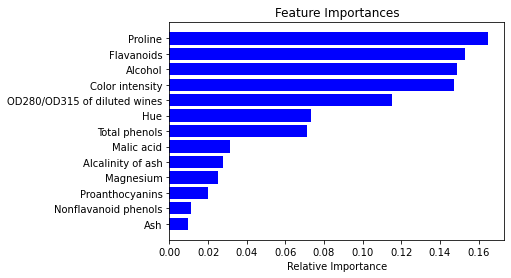

In [14]:
import numpy as np
import matplotlib.pyplot as plt
features = list(X.columns)
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### Grid search example 

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [16]:
randomForest = RandomForestClassifier()
grid_para_forest = [{
    "n_estimators": [25, 50, 100],
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int),
    "random_state": [42]}]
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(X_train, y_train)

CPU times: user 10.5 s, sys: 865 ms, total: 11.4 s
Wall time: 1min 27s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': range(1, 10),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]),
                          'n_estimators': [25, 50, 100],
                          'random_state': [42]}],
             scoring='accuracy')

In [17]:
grid_search_forest.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 25,
 'random_state': 42}

In [18]:
grid_search_forest.best_score_

0.9857142857142858

In [19]:
print("The training error is: %.5f" % (1 - grid_search_forest.score(X_train, y_train)))
print("The test     error is: %.5f" % (1 - grid_search_forest.score(X_test, y_test)))

The training error is: 0.00000
The test     error is: 0.00000


### Boosting Methods

Bagging reduces variance by averaging but has little effect on bias.
- Can we average and reduce bias? (Michael Kerns in 1988)
- Yes, Boosting! (Robert Schapire in 1990)

Step fashion approach:
- devise computer program for deriving rough rules (weak classifier)
- apply procedure to subset of examples and obtain a simple rule 
- apply to 2nd subset of examples and obtain a 2nd rule
- repeat T times

How to choose examples on each round?
- concentrate on “hardest” examples (those most often misclassified by previous rule)

How to combine the rules into single prediction rule?
- take (weighted) majority vote of rules

boosting = general method of converting rough rules into highly accurate prediction rule 
- technically assume given “weak” learning algorithm that can consistently find classifiers at least slightly better than random, say, accuracy  55%
- given sufficient data, a boosting algorithm can provably construct single classifier with very high accuracy say, 99%


<img src="boost_map.png" width="400">

**Similar to finding the direction without knowning the exact point**:
1. starting point: Planet Fitness
2. going to walk by looking at the hill. 
    - make a right turn at every intersection. 

### Gradient Descent Approach

Let $\mathcal{H}$ be hypothesis class and $H$ be the ensemble classifier,
$$l(H)=\frac{1}{n}\sum_{i=1}^nl(H(x_i),y_i)$$
where $H(x)=\sum_{t=1}^T\alpha h_t(x)$ and $h_{t+1}=\operatorname*{argmin}_{h\in\mathcal{H}}l(H_t+\alpha h_t)$

Once $h_{t+1}$ is found, add to the ensemble $H_{t+1}=H_t+\alpha h_{t+1}$:
$$l(H+\alpha h)\approx l(H)+\alpha<\nabla l(H),h>$$

$$\operatorname*{argmin}_{h\in\mathcal{H}}l(H_t+\alpha h_t)\approx \operatorname*{argmin}_{h\in\mathcal{H}}<\nabla l(H),h>$$ 

Note: 
- we can ignore the constants when we minimize it when we use Taylor approximation.
- the inner product $<\nabla l(H),h>=\frac{\partial l}{\partial H}h$ 
$$\operatorname*{argmin}_{h\in\mathcal{H}}l(H_t+\alpha h_t)=\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}\frac{\partial l}{\partial H(x_i)}h(x_i)$$

We can do the boosting if we have an algorithm that solves as long as 
$$h_{t+1}=\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}\frac{\partial l}{\partial H(x_i)}h(x_i)<0$$

#### Algorithm
1. $H=0$
2. for $t=1: T-1$ do:
    1. $r_i=\frac{\partial l((H_t(x_1),y_1),\dots,(H_t(x_n),y_n)}{\partial H(x_i)}$
    2. $h_{t+1}=\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}^{n}r_ih(x_i)$
    3. if $\sum_{i=1}^{n}r_ih(x_i)<0$ then:
        1. $H_{t+1}=H_t+\alpha_{t+1}h_{t+1}$
    4. else
        1. return $H_t$
    5. end
3. end
4. return $H_T$


### Gradient Boost

- works for both classification and  regression
- Weak learners, $h\in\mathcal{H}$, are regressors $h(\vec{x})\in R$ for all x, typically fixed-depth (between 4-6) regression trees.
- Step size $\alpha$ is fixed to a small constant.
- Loss function: Any differentiable convex that decomposes over the sample
$$l(H)=\sum_{i=1}^{n}l(H(\vec{x}_i))$$ 
- Must to find a tree $h(\cdot)$ that maximizes

$$\begin{equation}
\begin{split}
h & =\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}^{n}r_ih(\vec{x}_i) \\ 
 & =-\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}^{n}t_i^2-2t_ih(\vec{x}_i)+(h(\vec{x}_i))^2\\
 & =-\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}^{n}(h(\vec{x}_i)-t_i)^2\\
\end{split}
\end{equation}$$

- assumptions:
    1. $\sum_{i=1}^nh^2(x_i)$ is constant so the normalization of prediction becomes simple and can always decrease $\sum_{i=1}^nh(x_i)r_i$. 
    2. CART tree is closed by defining the negative gradient $t_i=-r_i$
    
- if we use a square loss $l(H)=\frac{1}{2}\sum_{i=1}^n(H(x_i)-y_i)^2$,
    - the residual $t_i=-\frac{\partial l}{\partial H(x_i)}=y_i-H(\vec{x}_i)$
- we can use any differentiable and convex loss function - then the solution for the next week learner will always be the regression tree minimizing the square loss. 

#### Algorithm
1. $H=0$
2. for $t=1: T$ do:
    1. $t_i=y_i-H(x_i)$
    2. $h=\operatorname*{argmin}_{h\in\mathcal{H}}(h(x_i)-t_i)^2$
    3. $H=H+\alpha h$
3. end
4. return $H$

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

- GradientBoostingClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- GradientBoostingRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

In [21]:
grad = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1,random_state=1)
grad = grad.fit(X_train,y_train)
y_train_pred = grad.predict(X_train)
y_test_pred = grad.predict(X_test)
grad_train = accuracy_score(y_train, y_train_pred)
grad_test = accuracy_score(y_test, y_test_pred)
print('Decision grad train/test accuracies %.3f/%.3f' %(grad_train,grad_test))

Decision grad train/test accuracies 1.000/0.972


### AdaBoost

- Classification: $y_i\in[+1,−1]$
- Weak learners, $h\in\mathcal{H}$ are binary, $h(x_i)\in[−1,+1],\forall 𝑥$
- We perform line-search to obtain best step-size $\alpha$
- Use the exponential loss $l(H)=\sum_{i=1}^ne^{-y_iH(x_i)}$ and the gradient $r_i=-y_ie^{-y_iH(x_i)}$
- Notations:
    - let $w_i=\frac{e^{-y_iH(x_i)}}{Z}$ where $Z$ is the normalizing factor $Z=\sum_{i=1}^ne^{-y_iH(x_i)}$.
    - this makes $\sum_{i}^nw_i=1$ and $w_i$ is the weight. 
- The next weak learner can be solved by optimization. 

$$\begin{equation}
\begin{split}
h & =\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}^{n}r_ih(\vec{x}_i) \\ 
 & =\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}^{n}-y_ie^{-y_iH(x_i)}h(x_i)\\
 & =\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{i=1}^{n}-y_iw_ih(x_i)\\
 & =\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{h(x_i)\ne y_i}w_i + \sum_{h(x_i)= y_i}w_i\\
 & =\operatorname*{argmin}_{h\in\mathcal{H}}\sum_{h(x_i)\ne y_i}w_i + \big(1-\sum_{h(x_i)\ne y_i}w_i\big)\\
 & = \operatorname*{argmin}_{h\in\mathcal{H}}\sum_{h(x_i)\ne y_i}w_i\\
\end{split}
\end{equation}$$

- We can find the optimal step-size in the closed form every time we take a "gradient" step.
    - with give $l$, $\mathcal{H}$, and $h$:
    $$\alpha=\operatorname*{argmin}_{\alpha}l(H+\alpha h)=\operatorname*{argmin}_{\alpha}\sum_{i=1}^ne^{-y_i[H(x_i)+\alpha h(x_i)]}$$
    - take a derivative r.t. $\alpha$:
$$\begin{equation}
\begin{split}
0 & =\sum_{i=1}^{n}-y_iH(x_i)e^{-y_i[H(x_i)+\alpha h(x_i)]}\\
& = - \sum_{h(x_i)y_i=1}e^{-y_i[H(x_i)+\alpha h(x_i)]}+\sum_{h(x_i)y_i=-1}e^{-y_i[H(x_i)+\alpha h(x_i)]}\\
& = - \sum_{h(x_i)y_i=1}w_ie^{-\alpha}+\sum_{h(x_i)y_i=-1}w_ie^{\alpha}\\
& = -(1-\epsilon)e^{-\alpha}+\epsilon e^{\alpha}\\
\implies & \alpha = \frac{1}{2}\ln\frac{1-\epsilon}{\epsilon}
\end{split}
\end{equation}$$
    - where $\sum w_i$ is the weight classification error and $\epsilon<0.5$
- After taking a step, we recompute all the weights and then renormalize:
    - let the unnormalized weight be $\hat{w}_i$
    $$\hat{w}_i\gets\hat{w}_ie^{-\alpha h(x_i)y_i}$$
    - the normalizer $Z$ becomes
    $$Z\gets Z(2\sqrt{\epsilon(1-\epsilon)})$$
    - then 
    $$w_i\gets \frac{w_ie^{-\alpha h(x_i)y_i}}{2\sqrt{\epsilon(1-\epsilon)}}$$

#### Algorithm
1. $H_0=0$ and $w_i=\frac{1}{n},\forall i$
2. for $t=0: T-1$ do:
    1. calculate $h$ and $\epsilon$
    2. if $\epsilon<0.5$ then
        1. calculate $\alpha, H_{t+1}$, and $w_i, \forall i$
    3. else
        1. return $H_t$
    4. end
3. end
4. return $H_T$

In [22]:
from sklearn.ensemble import AdaBoostClassifier

- AdaBoostClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
- AdaBoostRegressor: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [23]:
ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1,random_state=1)
ada = ada.fit(X_train,y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('Decision ada train/test accuracies %.3f/%.3f' %(ada_train,ada_test))

Decision ada train/test accuracies 1.000/0.889


### XGBoost

- **Regularization**: XGBoost has an option to penalize complex models through both L1 and L2 regularization. 
- **Handling sparse data**: Missing values or data processing steps like one-hot encoding make data sparse. 
- **Weighted quantile sketch**: Most existing tree based algorithms can find the split points when the data points are of equal weights (using quantile sketch algorithm). However, they are not equipped to handle weighted data. XGBoost has a distributed weighted quantile sketch algorithm to effectively handle weighted data.
- **Block structure for parallel learning**: For faster computing, XGBoost can make use of multiple cores on the CPU. This is possible because of a block structure in its system design. Data is sorted and stored in in-memory units called blocks. Unlike other algorithms, this enables the data layout to be reused by subsequent iterations, instead of computing it again. This feature also serves useful for steps like split finding and column sub-sampling
- **Cache awareness**: Non-continuous memory access is required to get the gradient statistics by row index. Hence, XGBoost has been designed to make optimal use of hardware. This is done by allocating internal buffers in each thread, where the gradient statistics can be stored
- **Out-of-core computing**: This feature optimizes the available disk space and maximizes its usage when handling huge datasets that do not fit into memory


### XGBoost Regression
- Unique regression tree
    - start from a single leaf with initial predicited value $p_0=0.5$
    - calculate the similarity socre
    $$S=\frac{(\sum_{i=1}^n(y-p_i))^2}{n+\lambda}$$
    - split by the threshold:
        - need to quantify how much better the leaves cluster similar residuals than the root by gain ($G$)
        - $G$ is the sum of similarity score of left and right leaves - similarity score of root
        $$G=S_L+S_R-S_r$$
        - calculate the output value $O$ for each leaf
        $$O=\frac{\sum_{i=1}^n(y_i-p_i)}{n+\lambda}$$

In [24]:
df_xgb = pd.DataFrame({'x':[10,20,25,35],'y':[-10,7,8,-7]})
df_xgb

,x,y
0,10,-10
1,20,7
2,25,8
3,35,-7


In [25]:
df_xgb['p0'] = [0.5,0.5,0.5,0.5]
df_xgb['r0'] = df_xgb['y']-df_xgb['p0']

In [26]:
df_xgb

,x,y,p0,r0
0,10,-10,0.5,-10.5
1,20,7,0.5,6.5
2,25,8,0.5,7.5
3,35,-7,0.5,-7.5


The similarity score:
$$ S_0=\frac{(-10.5+6.5+7.5-7.5)^2}{4+\lambda}$$
- for now, let $\lambda=0$.

In [27]:
S0=df_xgb['r0'].sum()**2/(4)
print(S0)

4.0


- We can split by the threshold based on quantile: 15,22.5, and 30. 
- For each split, we calculate the gain.
- the appropriate split is the quantile that gives the highest gain!

In [28]:
Q=df_xgb['x']+(df_xgb['x'].shift(1)-df_xgb['x'])/2
Q=Q[1:]
Q

1    15.0
2    22.5
3    30.0
Name: x, dtype: float64

In [29]:
G_out,SL_out,SR_out = -10000,0,0
for t in Q:
    df_xgb1=df_xgb[df_xgb['x']<t]
    df_xgb2=df_xgb[df_xgb['x']>=t]
    SL=df_xgb1['r0'].sum()**2/len(df_xgb1)
    SR=df_xgb2['r0'].sum()**2/len(df_xgb2)
    G = SL+SR-S0
    print('t=',t,'SL=',SL, 'SR=',SR, 'G=',G)
    if (G>G_out):
        G_out=G
        SL_out=SL
        SR_out=SR
        t_out = t
SL1,SR1,G0,t0=SL_out,SR_out,G_out,t_out
print("the maximum gain:")
print('t=',t0,'SL=',SL1,'SR=',SR1,'G=',G0)

t= 15.0 SL= 110.25 SR= 14.083333333333334 G= 120.33333333333333
t= 22.5 SL= 8.0 SR= 0.0 G= 4.0
t= 30.0 SL= 4.083333333333333 SR= 56.25 G= 56.333333333333336
the maximum gain:
t= 15.0 SL= 110.25 SR= 14.083333333333334 G= 120.33333333333333


- Shows that the gain is highest when $x\le15$. 
- We will have a left subtree with $x\le15$, $x=[15]$ and a right subtree $x>15$, $x=[20, 25, 30]$.
- the output $O$ of a left subtree is $-10.5$.
- The next plit is on x=[20, 25, 35]:

In [31]:
G_out,SL_out,SR_out,t_out = -10000,0,0,0
S1 = SR1
for t in [22.5, 30]:
    df_xgb1=df_xgb[(df_xgb['x']>t0) & (df_xgb['x']<=t)]
    df_xgb2=df_xgb[df_xgb['x']>t]
    SL=df_xgb1['r0'].sum()**2/len(df_xgb1)
    SR=df_xgb2['r0'].sum()**2/len(df_xgb2)
    G = SL+SR-S1
    if (G>G_out):
        SL_out = SL
        SR_out = SR
        G_out = G
        t_out = t
t1,SL2,SR2,G1=t_out,SL_out,SR_out,G_out
print("the maximum gain:")
print('t=',t1,'SL=',SL1,'SR=',SR1,'G=',G1)

the maximum gain:
t= 30 SL= 110.25 SR= 14.083333333333334 G= 140.16666666666666


- the next split is when $x\le30$
- a left subtree will have $x=[20,25]$ and a right subtree will have $x=[30]$
- the output of a right subtree is $-7.5$
- we can still split the left subtree for $x\le22.5$

In [32]:
S2 = SL2
SL = 6.5**2
SR = 7.5**2
G = SL+SR-S2
print("Similarity of left subtree:",SL, "of right subtree:",SR, "and gain:",G)

Similarity of left subtree: 42.25 of right subtree: 56.25 and gain: 0.5


- To prune the tree, we give an arbitrary constant $\gamma$.
- if $G-\gamma<0$, we remove the branch.
- if $G-\gamma\ge0$, we keep the branch.
- alternatively, we can let $\lambda>0$ and test if 
    - $G<0$, remove the branch
    - $G>0$, we keep the branch
    - let $\lambda=1$

In [33]:
S0_new = df_xgb['r0'].sum()**2/(len(df_xgb)+1)
G1_new = 10.5**2/2+(6.5+7.5-7.5)**2/4-S0_new
S1_new = (6.5)**2/4
G2_new=(6.5+7.5)**2/3+7.5**2/2-S1_new
S2_new =(6.5+7.5)**2/3
G2_new=(6.5)**2/2+7.5**2/2-S2_new
print(G2_new)

-16.08333333333333


- it shows that the new $G<0$.
- therefore, we can remove the branch of $x=[20,25]$ split.
- how about the output? We only need to worry about $x=[20,25]$ node.

In [34]:
x = df_xgb['x'].tolist()
r = df_xgb['r0'].tolist()
L_sum, RL_sum, RR_sum = 0,0,0
L_count, RL_count, RR_count = 0,0,0
for i in range(0,len(r)):
    if x[i]<t0:
        L_sum +=r[i]
        L_count += 1
    elif x[i]<=t1:
        RL_sum +=r[i]
        RL_count += 1
    else :
        RR_sum +=r[i]
        RR_count += 1

O_list = []
for i in range(0,len(r)):
    if x[i]<t0:
        O = L_sum/L_count
        O_list.append(O)
    elif x[i]<=t1:
        O = RL_sum/RL_count
        O_list.append(O)
    else :
        O = RR_sum/RR_count
        O_list.append(O)
df_xgb['O0']=O_list
df_xgb

,x,y,p0,r0,O0
0,10,-10,0.5,-10.5,-10.5
1,20,7,0.5,6.5,7.0
2,25,8,0.5,7.5,7.0
3,35,-7,0.5,-7.5,-7.5


- The new predict value $p_1=p_0+\eta O$ where $\eta=0.3$ by default.
- then we can calcualte the new residual $r_1=y-p_1$:

In [35]:
df_xgb['p1']=df_xgb['p0']+0.3*df_xgb['O0']
df_xgb['r1']=df_xgb['y']-df_xgb['p1']
df_xgb

,x,y,p0,r0,O0,p1,r1
0,10,-10,0.5,-10.5,-10.5,-2.65,-7.35
1,20,7,0.5,6.5,7.0,2.60,4.40
2,25,8,0.5,7.5,7.0,2.60,5.40
3,35,-7,0.5,-7.5,-7.5,-1.75,-5.25


### XGBoost Classification
- Similiarity Score: 
    $$S_{i-1}=\frac{\sum(y_i-p_i)^2}{\sum(p_{i-1}(1-p_{i-1}))+\lambda}$$ 
- Cover $C$ the minimum number of residuals in each leaf
$$C=\sum(p_{i-1}(1-p_{i-1}))$$
    - in regression: $C=n$
    - in classification $C_{min}=1$ by default but we can set $C=0$
- Output $O$:
$$O_i=\frac{\sum(y_i-p_i)}{\sum(p_{i-1}(1-p_{i-1}))+\lambda}$$
- Prediction:
$$\log{P^i}=\log{{\frac{P^{i-1}}{1-P^{i-1}}+\eta O_i}}$$
$$\to P^i=\frac{e^{\log{P^i}}}{1+e^{\log{P^i}}}$$

In [36]:
df_xgb = pd.DataFrame({'x':[10,20,25,35],'y':[0,1,1,0]})
df_xgb

,x,y
0,10,0
1,20,1
2,25,1
3,35,0


In [37]:
S0=0
p0=0.5
df_xgb['r0']=df_xgb['y']-p0
G_out,SL_out,SR_out = -10000,0,0

Q=[15,22.5,30]
for t in Q:
    df_xgb1=df_xgb[df_xgb['x']<t]
    df_xgb2=df_xgb[df_xgb['x']>=t]
    SL=df_xgb1['r0'].sum()**2/(len(df_xgb1)*(p0*(1-p0)))
    SR=df_xgb2['r0'].sum()**2/(len(df_xgb2)*(p0*(1-p0)))
    G = SL+SR-S0
    if (G>G_out):
        G_out=G
        SL_out=SL
        SR_out=SR
        t_out = t
SL1,SR1,G0,t0=SL_out,SR_out,G_out,t_out
print("frist split at:",t0,'has gain',G0)
G_out,SL_out,SR_out = -10000,0,0
S1=SR1
Q=list(set(Q)-set([t0]))
for t in Q:
    L=df_xgb[(df_xgb['x']>t0)&(df_xgb['x']<=t)]['r0'].tolist()
    R=df_xgb[(df_xgb['x']>t)]['r0'].tolist()
    SL=np.sum(L)**2/(len(L)*(p0*(1-p0)))
    SR=np.sum(R)**2/(len(R)*(p0*(1-p0)))
    G = SL+SR-S1 
    if (G>G_out):
        G_out=G
        SL_out=SL
        SR_out=SR
        t_out = t
SL2,SR2,G1,t1=SL_out,SR_out,G_out,t_out
print("second split at",t1,'has gain',G1)

frist split at: 15 has gain 1.3333333333333333
second split at 30 has gain 2.6666666666666665


In [39]:
r0 = df_xgb['r0'].tolist()
y = df_xgb['y'].tolist()
x = df_xgb['x'].tolist()
c0,c1,c2 = 0,0,0
r0_sum, r1_sum,r2_sum = 0,0,0
for i in range(0,len(r0)):
    if x[i]<=t0:
        c0 = c0+p0*(1-p0)
        r0_sum = r0_sum + r0[i]
    elif x[i]<=t1:
        c1 = c1+p0*(1-p0)
        r1_sum = r1_sum+r0[i]
    else:
        c2 = c2+p0*(1-p0)
        r2_sum = r2_sum+r0[i]
O_list = []
for i in range(0,len(r0)):
    if x[i]<=t0:
        O = r0_sum/c0
        O_list.append(O)
    elif x[i]<=t1:
        O = r1_sum/c1
        O_list.append(O)
    else:
        O = r2_sum/c2
        O_list.append(O)
df_xgb['O0']=O_list
df_xgb['P0']=np.log(p0/(1-p0))
df_xgb['log(P1)']=df_xgb['P0']+0.3*df_xgb['O0']
df_xgb

,x,y,r0,O0,P0,log(P1)
0,10,0,-0.5,-2.0,0.0,-0.6
1,20,1,0.5,2.0,0.0,0.6
2,25,1,0.5,2.0,0.0,0.6
3,35,0,-0.5,-2.0,0.0,-0.6


In [40]:
df_xgb['P1']=np.exp(df_xgb['log(P1)'])/(1+np.exp(df_xgb['log(P1)']))
df_xgb['r1']=df_xgb['y']-df_xgb['P1']
df_xgb

,x,y,r0,O0,P0,log(P1),P1,r1
0,10,0,-0.5,-2.0,0.0,-0.6,0.354344,-0.354344
1,20,1,0.5,2.0,0.0,0.6,0.645656,0.354344
2,25,1,0.5,2.0,0.0,0.6,0.645656,0.354344
3,35,0,-0.5,-2.0,0.0,-0.6,0.354344,-0.354344


### XGBoost Optimization

- Regression loss function: $\frac{1}{2}(y_i-p_i)^2$
- Classification loss function: $-[y_i\log{p_i}-(1-y_i)\log{1-p_i}]$
- Generally
$$\sum_{i=1}^{n}L(y_i,p_i)+\gamma T + \frac{1}{2}\lambda O_i^2=\sum_{i=1}^nL(y_i,p^0+O_i)+\frac{1}{2}\lambda O_i^2$$

- the loss function uses a second order Taylor Approximation for the optimal output value:
$$L(y,p_i+O)\approx L(y,p_i)+\frac{d}{dp_i}L(y,p_i)O_i+\frac{1}{2}\big[\frac{d^2}{dp_i^2}L(y,p_i)\big]O_i^2$$
- for regression:
$$\begin{equation}
\begin{split}
\Big[\sum_{i=1}^n L(y_i,p_i^0+O)\Big]+\frac{1}{2}\lambda O^2 & = L(y_1,p_1^0)+g_1O+\frac{1}{2}h_1O^2+\cdots+L(y_n,p_n^0)+g_nO+\frac{1}{2}h_nO^2+\frac{1}{2}\lambda O^2\\
& =L(y_1,p_1^0)+\sum_{i=1}^n g_iO + \frac{1}{2}\sum_{i=1}^n (h_i+\lambda)O^2\\
\end{split}
\end{equation}$$
    - where $g_i=\frac{d}{dp_i}L(y_i,p_i)$ and $h_i=\frac{d^2}{dp_i^2}L(y_i,p_i)$
- to find the optimal $O$ value, we make a derivative r.t. $O$ and set equals to 0:
$$\sum_{i=1}^n g_i + \sum_{i=1}^n(h_i+\lambda)O=0\to O=-\sum_{i=1}^n\frac{g_i}{h_i+\lambda}=\sum_{i=1}^n\frac{y_i-p_i}{n+\lambda}$$

- by substituting the negative of optimized $O$, $-O$,
$$\begin{equation}
\begin{split}
L(y,p_i^0) & =L(y_1,p_1^0)+\sum_{i=1}^n g_i\big(\sum_{i=1}^n\frac{g_i}{h_i+\lambda}\big) - \frac{1}{2}\sum_{i=1}^n (h_i+\lambda)\big(\sum_{i=1}^n\frac{g_i}{h_i+\lambda}\big)^2\\
& =L(y_1,p_1^0)+\frac{1}{2}\sum_{i=1}^n\frac{g_i^2}{h_i+\lambda}=L(y_1,p_1^0)+\frac{1}{2}S
\end{split}
\end{equation}$$

In [41]:
from xgboost import XGBClassifier

**Note** Jupyter notebook does not have XGBoost package installed and it needs to be installed.
- For window: https://stackoverflow.com/questions/35510582/how-can-i-install-xgboost-package-in-python-on-windows
- For mac:https://machinelearningmastery.com/install-xgboost-python-macos/

In [42]:
xgb = XGBClassifier( learning_rate =0.1,n_estimators=1000,max_depth=None,min_child_weight=1,gamma=0,
 subsample=0.8,colsample_bytree=0.8,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)

- XGBClassifier: https://xgboost.readthedocs.io/en/latest/python/python_intro.html, https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

In [43]:
xgb = xgb.fit(X_train,y_train)
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
xgb_train = accuracy_score(y_train, y_train_pred)
xgb_test = accuracy_score(y_test, y_test_pred)
print('Decision xgb train/test accuracies %.3f/%.3f' %(xgb_train,xgb_test))

/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "scale_pos_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[08:36:01] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Decision xgb train/test accuracies 1.000/1.000


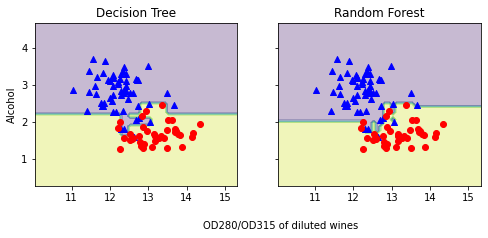

In [45]:
from sklearn.preprocessing import LabelEncoder
df_wine=df_wine[df_wine['Class label']!=1]
y=df_wine['Class label'].values
X=df_wine[['Alcohol','OD280/OD315 of diluted wines']].values
le=LabelEncoder()
y=le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1,stratify=y)
x_min = X_train[:,0].min()-1
x_max = X_train[:,0].max()+1
y_min = X_train[:,1].min()-1
y_max = X_train[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),np.arange(y_min,y_max,0.1))
f, axarr = plt.subplots(nrows=1, ncols=2,sharex='col',sharey='row',figsize=(8,3))
for idx, clf, tt in zip([0,1],[tree,RF],
                       ['Decision Tree','Random Forest']):
    clf.fit(X_train,y_train)
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx,yy,Z,alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0,0],X_train[y_train==0,1],c='blue',marker='^')
    axarr[idx].scatter(X_train[y_train==1,0],X_train[y_train==1,1],c='red',marker='o')
    axarr[idx].set_title(tt)
axarr[0].set_ylabel('Alcohol')
plt.text(10.1,-0.8,s='OD280/OD315 of diluted wines',ha='center',va='center')
plt.show()

### Summary

- Decision Trees: need to reduce variance. How?
- Bagging: Bootstrap (random subsampling with replacement)
- Random Forest
    - Bagging method with full decision tree method
    - Easy, feature selection, less data pre-processing
    - But… How to reduce bias?
- Boosting
    - Gradient Boost
        - Good for classification & regression
        - Simple when we use the square loss function
        - Constant small step-size
        - Works with any convex differentiable loss function
    - AdaBoost
        - Only for classification
        - Invented first but turned to be one of gradient boost (exponential loss function)
        - Need to compute weight and step-size for every iteration 
    - XGBoost
        - Extreme Gradient Boost
        - One of most popular ML algorithms now days... 